In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [2]:
### Simulate data
N = 100
alpha = 2.3
sigma = 2.
slope = 4.
x = np.random.normal(size=N)
y = alpha + slope * x + sigma * np.random.normal(size=N)

In [3]:
### Create Stan-friendly data dictionary
data = {
    'N': N, 
    'x': x, 
    'y': y
}

In [4]:
vectorized_program_code = """
data {
    int<lower=0> N;         
    vector[N] x;            
    vector[N] y;            
}

parameters {
    real alpha;             
    real beta;              
    real<lower=0> sigma2;    
}

transformed parameters {
    real<lower=0> sigma;
    sigma = sqrt(sigma2);
}

model {
    // Priors
    alpha ~ normal(0, 10);
    beta ~ normal(0, 10);
    sigma2 ~ inv_gamma(1, 1);

    // Likelihood
    y ~ normal(alpha + beta * x, sigma);
}
"""

In [5]:
vectorized_posterior = stan.build(vectorized_program_code, data=data)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 

Building: 50.6s, done.


In [6]:
%%time
fit_vectorized = vectorized_posterior.sample(num_chains=4, num_samples=2000, num_warmup=1000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 5.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf

CPU times: user 266 ms, sys: 531 ms, total: 797 ms
Wall time: 1.11 s


In [7]:
summary = az.summary(fit_vectorized)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.860,0.229,2.433,3.304,0.003,0.002,7809.0,5986.0,1.0
beta,4.308,0.239,3.862,4.770,0.003,0.002,7038.0,5540.0,1.0
sigma,2.257,0.163,1.974,2.583,0.002,0.001,7672.0,5968.0,1.0


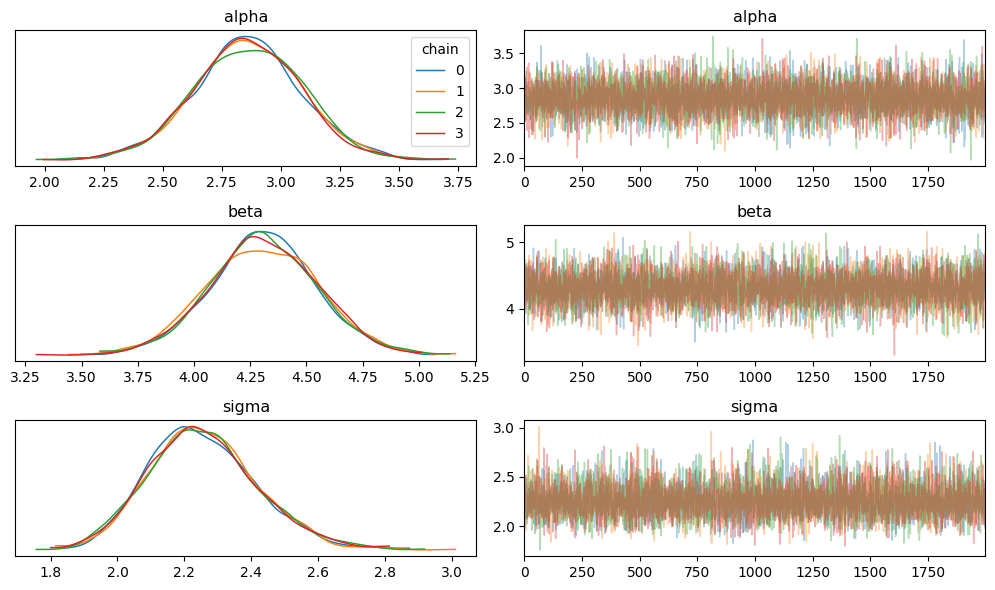

In [9]:
axarr = az.plot_trace(fit_vectorized, var_names=['alpha', 'beta', 'sigma'], figsize=(10, 6), compact=False, legend=True)
plt.tight_layout()

__How accurate are the posterior means and how much uncertainty is left?__ \
Alpha: \
Our true alpha value was alpha = 2.3. The mean fitted by the model is slightly larger than our true value. The alpha distribution is relatively unskewed implying lower uncertainty.\
\
Beta: \
Our true beta value was slope = 4. The mean fitted by the model is slightly larger than our true value. Again the beta distribution is relatively unskewed implying lower uncertainty.\
\
Sigma: \
Our true sigma value was sigma = 2. Th mean fitted by the model is slightly larger than our true value. The sigma distrubtion however features a right skew suggesting that the noise parameter may have a boundary condition on the left side. It also means that the mean is skewed more positively than the mode, which is not the case for unskewed normal distributions.\
\
The accuracy of all the means seem to only be off by about 0.2-0.3. Our standard deviations are about 0.15-0.25. Additionally, each posterior mean falls in between its respective the hdi_3% and hdi_97% suggesting our data is credible. Laslty, the r_hat values of 1.0 reassure that our data is converging properly and suggests that our data is efficient because the samples are dependent.

In [15]:
### Simulate data
N = 1000 # N * 10 observations!
alpha = 2.3
sigma = 2.
slope = 4.
x = np.random.normal(size=N)
y = alpha + slope * x + sigma * np.random.normal(size=N)

In [16]:
data = {
    'N': N, 
    'x': x, 
    'y': y
}

In [17]:
vectorized_posterior = stan.build(vectorized_program_code, data=data)

Building: found in cache, done.


In [18]:
%%time
fit_vectorized = vectorized_posterior.sample(num_chains=4, num_samples=2000, num_warmup=1000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 0.000508 seconds
  1000 transitions using 10 leapfrog steps per transition would take 5.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000247 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.47 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_a22ncou4/model_vtcomxp7.stan', line 21, column 4 to column 40)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either 

CPU times: user 438 ms, sys: 188 ms, total: 625 ms
Wall time: 1.53 s


In [19]:
summary = az.summary(fit_vectorized)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.347,0.064,2.223,2.461,0.001,0.001,7884.0,5878.0,1.0
beta,3.958,0.062,3.839,4.075,0.001,0.001,7200.0,5695.0,1.0
sigma,2.022,0.045,1.937,2.105,0.001,0.000,7270.0,5611.0,1.0


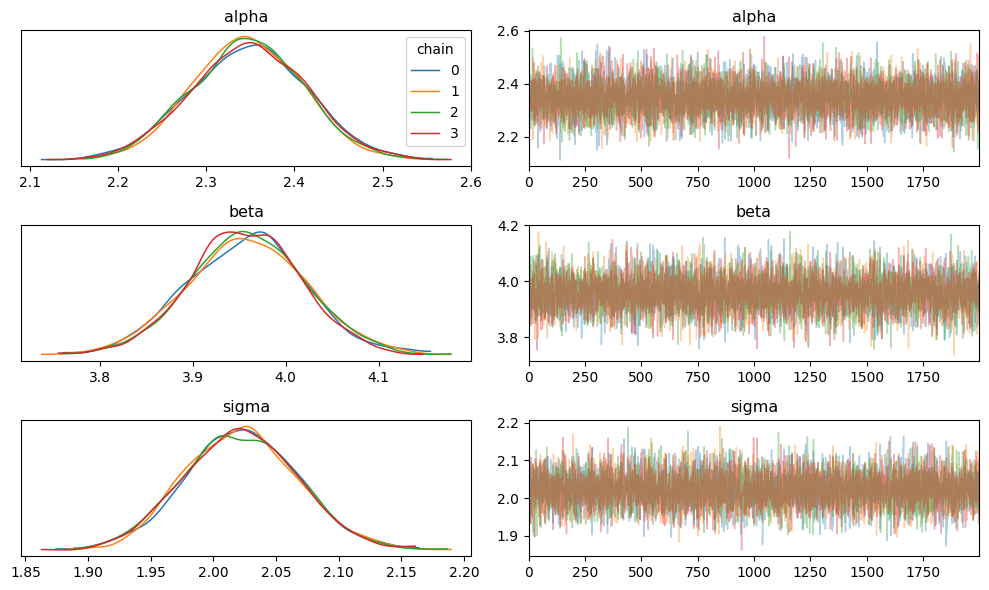

In [20]:
axarr = az.plot_trace(fit_vectorized, var_names=['alpha', 'beta', 'sigma'], figsize=(10, 6), compact=False, legend=True)
plt.tight_layout()

__What happened to the precision and uncertainty when we add more observations?__ \
The accuracy of all the means seem to only be off by about 0.02-0.15. This is much more precise than the previous model. Additionally the standard deviation is 0.04-0.06 which is also much less than the previous model implying less uncertainty. We also see the slight skew feature of the sigma density plot to be corrected in this final model.
